## Zahra khatibi - 610398119 - HW7 - Solving TSP With SOM

In [159]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
f = open("1.tsp")
matrix = f.read().split("\n")
n = 29
m = 5
data = [[0 for _ in range(2)] for _ in range(n)]
l_x = []
l_y = []
alfa = 0.01
for i in range(n):
    ith , x , y = matrix[i].split()
    data[i][0] = int(float(x))
    data[i][1] = int(float(y))
    l_x.append(int(float(x)))
    l_y.append(int(float(y)))

In [46]:
from random import randint
w_x = []
w_y = []
for i in range(m):
    k1 = randint(min(l_x),max(l_x))
    k2= randint(min(l_y),max(l_y))
    w_x.append(k1)
    w_y.append(k2)

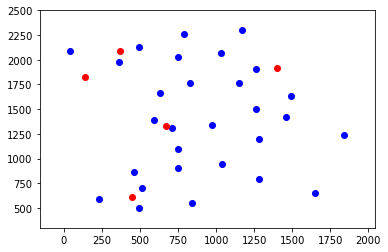

In [47]:
import matplotlib.pyplot as plt
plt.plot(l_x, l_y, 'ro',color='b')
plt.plot(w_x, w_y, 'ro',color='r')
plt.axis([min(l_x)-200, max(l_x)+200, min(l_y)-200, max(l_y)+200])
plt.show()

In [48]:
def choose_cluster(arr):
    global w_x
    global w_y
    n = len(w_x)
    min_weight = 10e10
    number_of_cluster = n+2
    for i in range(n):
        weight = math.sqrt((arr[0]-w_x[i])**2 + (arr[1]-w_y[i])**2)
        if weight < min_weight:
            number_of_cluster = i
            min_weight = weight
        if(i==n-1):
            w_x[number_of_cluster] += (alfa * (arr[0] - w_x[number_of_cluster]))
            w_y[number_of_cluster] += (alfa * (arr[1] - w_y[number_of_cluster]))
    return number_of_cluster

In [49]:
colors = []
for i in range(m):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

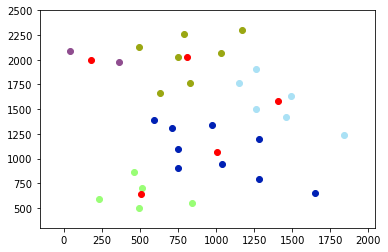

In [50]:
cluster_dictionary = {"clurste0": set(), "clurste1": set(), "clurste2":set(), "clurste3": set(),
                      "clurste4": set(), "clurste5": set(), "clurste6": set()}
for _ in range(3000):
    for i in range(n):
        choose_cluster(data[i])
    alfa *= 0.99
for i in range(n):
    for j in range(m):
        if choose_cluster(data[i]) == j:
            plt.plot(data[i][0], data[i][1], 'ro',color=colors[j])
            cluster_dictionary["clurste"+str(j)].add(i)
        
    plt.axis([min(l_x)-200, max(l_x)+200, min(l_y)-200, max(l_y)+200])
plt.plot(w_x, w_y, 'ro',color='red')

In [51]:
cluster_dictionary

{'clurste0': {10, 13, 16, 17, 21},
 'clurste1': {3, 6, 9, 12, 14, 15, 18, 19, 24},
 'clurste2': {2, 28},
 'clurste3': {0, 7, 22, 23, 26, 27},
 'clurste4': {1, 4, 5, 8, 11, 20, 25},
 'clurste5': set(),
 'clurste6': set()}

In [52]:
def distancee (n1 , n2):
    return math.sqrt((data[n2][0]-data[n1][0])**2 + (data[n2][1]-data[n1][1])**2 )


In [53]:
def find_min_path(arr):
    min_permut = []
    min_path = 10e10
    path = 0
    for permut in arr:
        for j in range(0,len(permut)-1):
            path += distancee(permut[j],permut[j+1])
        if path < min_path:
            min_path = path
            min_permut = permut
        path = 0
    return min_permut

In [62]:
import itertools
min_path_dic = {"clurste0": set(), "clurste1": set(), "clurste2":set(), "clurste3": set(), "clurste4": set()}
for i in range(m):
    lst = list(cluster_dictionary["clurste"+str(i)])
    permutations = list(itertools.permutations(lst))
    min_path_dic["clurste"+str(i)].add(find_min_path(permutations))

In [63]:
min_path_dic

{'clurste0': {(10, 21, 13, 17, 16)},
 'clurste1': {(6, 24, 18, 14, 3, 19, 9, 12, 15)},
 'clurste2': {(2, 28)},
 'clurste3': {(22, 26, 7, 23, 0, 27)},
 'clurste4': {(11, 5, 8, 25, 4, 20, 1)}}

[10, 21, 13, 17, 16]
[6, 24, 18, 14, 3, 19, 9, 12, 15]
[2, 28]
[22, 26, 7, 23, 0, 27]
[11, 5, 8, 25, 4, 20, 1]


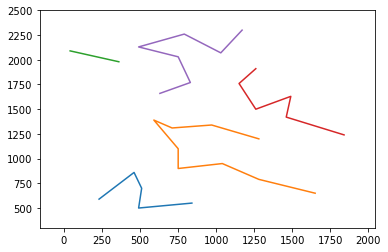

In [350]:
end_node = []
internal_node = []
list_of_cluster = []
for i in range(m):
    l = list(min_path_dic["clurste"+str(i)])
    l = list(l[0])
    list_of_cluster.append(l)
    print(l)
    end_node.append(l[0])
    end_node.append(l[-1])
    for i in range(1,len(l)-1):
        internal_node.append(l[i])
    p_x = [l_x[j] for j in l]
    p_y = [l_y[k] for k in l]
    p = plt.plot(p_x,p_y)
    plt.axis([min(l_x)-200, max(l_x)+200, min(l_y)-200, max(l_y)+200])

In [351]:
def check(city_number1, city_number2 , l_cluster):
    for i in range(m):
        if l_cluster[i][0]==city_number1 and l_cluster[i][len(l_cluster[i])-1]==city_number2 or l_cluster[i][0]==city_number2 and l_cluster[i][len(l_cluster[i])-1]==city_number1:
                return False
    return True

In [344]:
print(end_node)
import numpy as np
end_node = list(np.random.choice(end_node, len(end_node) ,replace=False))
end_node = [15, 28, 10, 2, 1, 6, 16, 27, 22, 11]

In [345]:
def find_closest(city_num, arr):
    global end_node
    min_weight = 10e10
    closest = n+1
    for i in range(len(arr)):
        if arr[i] != city_num:
            weight = math.sqrt((data[city_num][0]-data[arr[i]][0])**2 + (data[city_num][1]-data[arr[i]][1])**2)
            if weight < min_weight and check(city_num, arr[i] , list_of_cluster) and (arr[i] in end_node):
                min_weight = weight
                closest = arr[i]
            weight = 0
    return closest

In [352]:
for x in end_node:
    k = find_closest(x, end_node)
    end_node.remove(k)
    print("x: ", x , end= " || ")
    print("k: ", k , "\n")

x:  10 || k:  15 

x:  16 || k:  1 

x:  6 || k:  22 

x:  2 || k:  11 

x:  28 || k:  27 



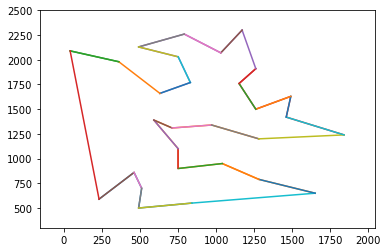

In [353]:
PATH = [16, 17, 13, 21, 10, 6, 24, 18, 14, 3, 19, 9, 12, 15, 22, 26, 7, 23, 0, 27, 11, 5, 8, 25, 4, 20, 1, 28, 2]
for i in range(m):
    l = list(min_path_dic["clurste"+str(i)])
    l = list(l[0])
    p_x = [l_x[j] for j in l]
    p_y = [l_y[k] for k in l]
    p = plt.plot(p_x,p_y)
    plt.axis([min(l_x)-200, max(l_x)+200, min(l_y)-200, max(l_y)+200])
    
for i in range(n-1): 
    plt.plot([data[PATH[i]][0], data[PATH[i+1]][0]], [data[PATH[i]][1], data[PATH[i+1]][1]])
plt.plot([data[PATH[0]][0], data[PATH[n-1]][0]], [data[PATH[0]][1], data[PATH[n-1]][1]])